In [2]:
#Importing necessary libraries:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [11]:
#Loading and Preprocessing Data
df = pd.read_csv('company.csv')
print(df.shape)
print(list(df.columns))

(495478, 7)
['CustomerID', 'InvoiceNo', 'InvoiceDate', 'StockCode', 'Description', 'Quantity', 'UnitPrice']


C:\Users\Dilip\AppData\Local\Temp\ipykernel_8856\2491307409.py:2: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('company.csv')


In [13]:
#Let's look at the data:
df.head()

,CustomerID,InvoiceNo,InvoiceDate,StockCode,Description,Quantity,UnitPrice
0,17850.0,536365,25-09-2020,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,8.415
1,17850.0,536365,25-09-2020,71053,WHITE METAL LANTERN,6,11.187
2,17850.0,536365,25-09-2020,84406B,CREAM CUPID HEARTS COAT HANGER,8,9.075
3,17850.0,536365,25-09-2020,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,11.187
4,17850.0,536365,25-09-2020,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,11.187


In [15]:
df.tail()

,CustomerID,InvoiceNo,InvoiceDate,StockCode,Description,Quantity,UnitPrice
495473,15804.0,581585,03-10-2021,22466,FAIRY TALE COTTAGE NIGHT LIGHT,12,6.435
495474,13113.0,581586,04-10-2021,22061,LARGE CAKE STAND HANGING STRAWBERY,8,9.735
495475,13113.0,581586,04-10-2021,23275,SET OF 3 HANGING OWLS OLLIE BEAK,24,4.125
495476,13113.0,581586,04-10-2021,21217,RED RETROSPOT ROUND CAKE TINS,24,29.535
495477,13113.0,581586,04-10-2021,20685,DOORMAT RED RETROSPOT,10,23.364


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 495478 entries, 0 to 495477
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   CustomerID   361878 non-null  float64
 1   InvoiceNo    495478 non-null  object 
 2   InvoiceDate  495478 non-null  object 
 3   StockCode    495478 non-null  object 
 4   Description  494024 non-null  object 
 5   Quantity     495478 non-null  int64  
 6   UnitPrice    495478 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 26.5+ MB


In [22]:
#Checking the number of missing values:
df.isna().sum()

CustomerID     133600
InvoiceNo           0
InvoiceDate         0
StockCode           0
Description      1454
Quantity            0
UnitPrice           0
dtype: int64

In [26]:
#Generating descriptive statistics include those that summarize the central tendency, dispersion and shape of the dataset’s distribution, excluding null values.
df.describe()

,CustomerID,Quantity,UnitPrice
count,361878.000000,495478.000000,495478.000000
mean,15547.871368,8.605486,14.956993
std,1594.402590,227.588756,327.740946
min,12346.000000,-80995.000000,-36504.798000
25%,14194.000000,1.000000,4.125000
50%,15514.000000,3.000000,6.930000
75%,16931.000000,10.000000,13.629000
max,18287.000000,80995.000000,128601.000000


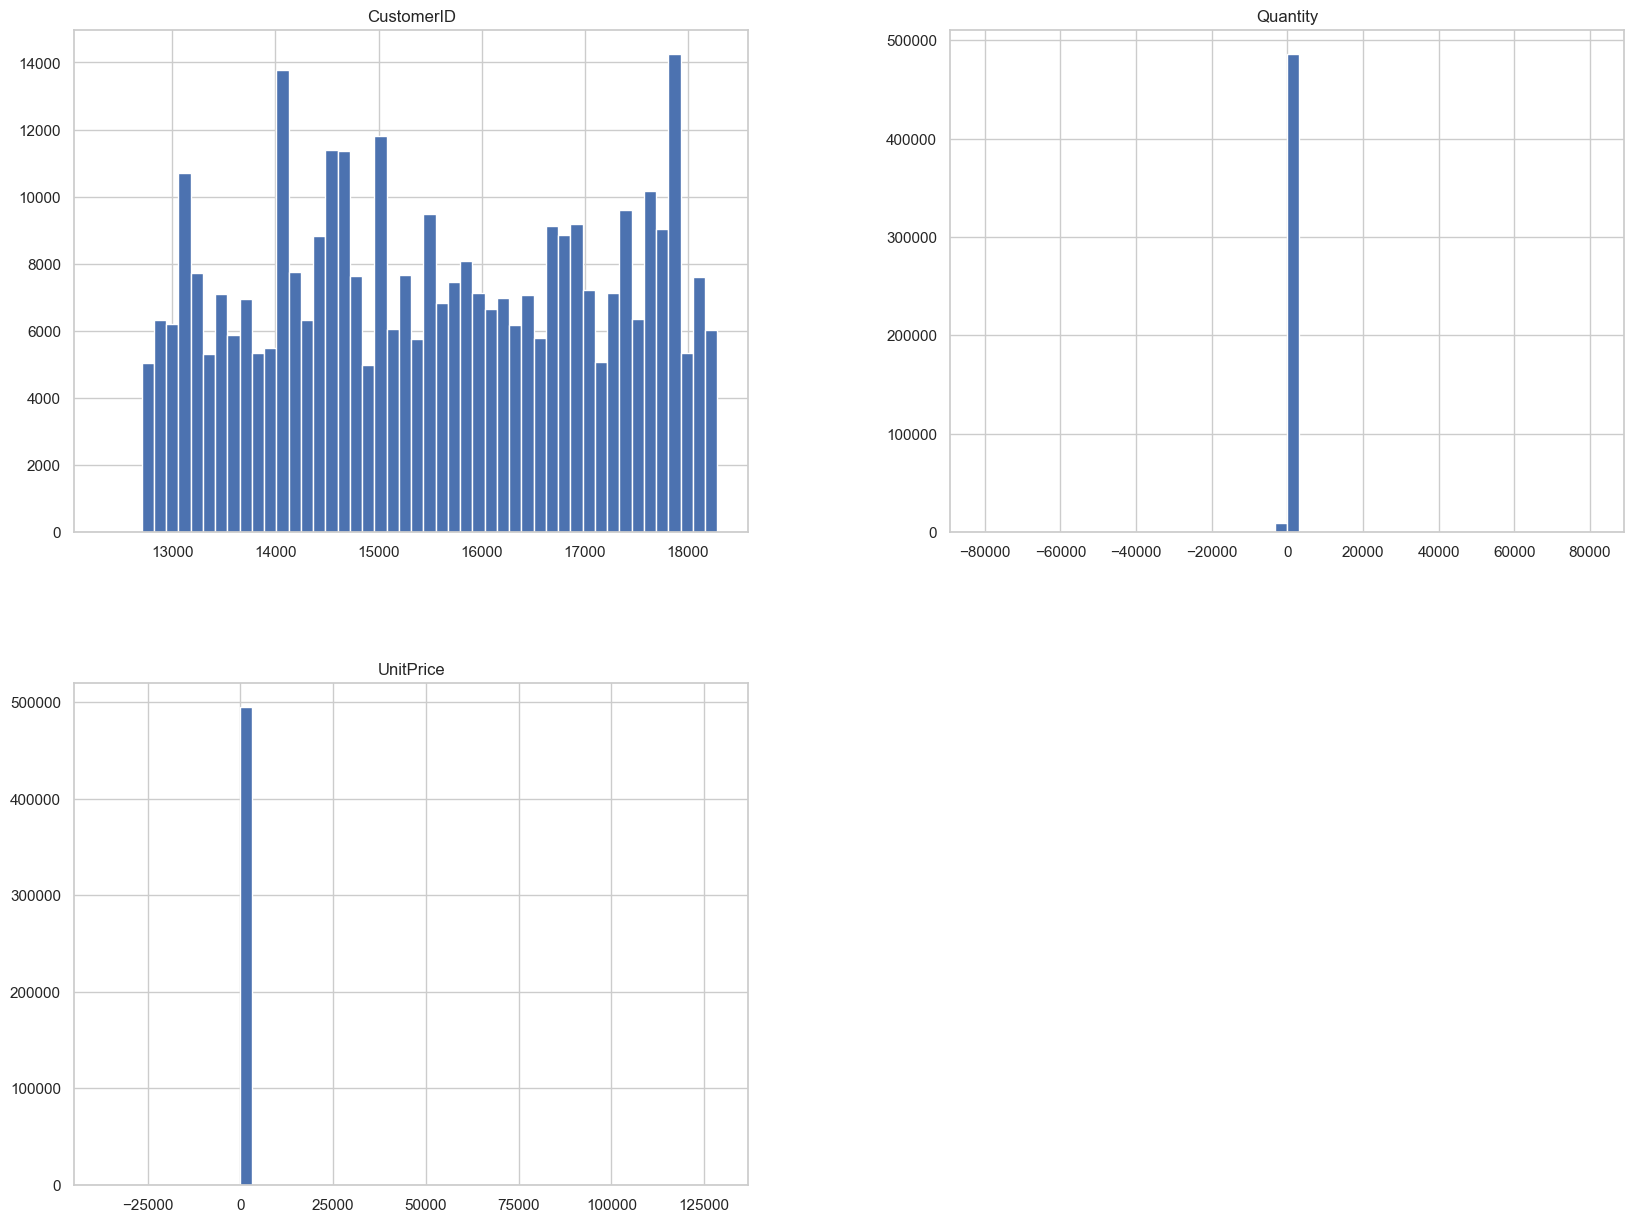

In [32]:
#Plotting attributes Histogram:
%matplotlib inline
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(20,15))
plt.savefig("attribute_histogram_plots")
plt.show()

In [38]:
#Checking for negative values in the feature-Quantity
df['Quantity'].describe()

count    495478.000000
mean          8.605486
std         227.588756
min      -80995.000000
25%           1.000000
50%           3.000000
75%          10.000000
max       80995.000000
Name: Quantity, dtype: float64

(array([2.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 4.000e+00, 9.186e+03]),
 array([-8.09950e+04, -7.28956e+04, -6.47962e+04, -5.66968e+04,
        -4.85974e+04, -4.04980e+04, -3.23986e+04, -2.42992e+04,
        -1.61998e+04, -8.10040e+03, -1.00000e+00]),
 <BarContainer object of 10 artists>)

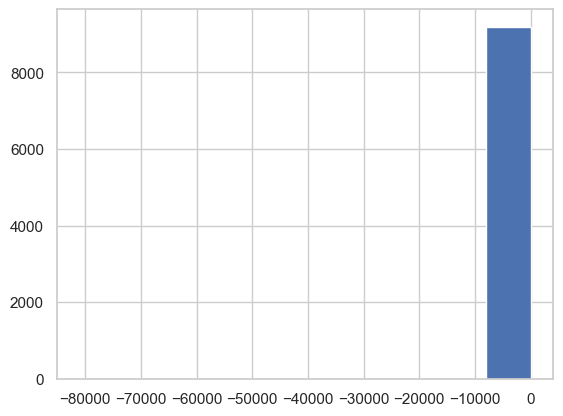

In [40]:
plt.hist(df['Quantity'][df['Quantity']<0])

In [ ]:
#There are some negative values in the “Quantity” feature, quantity to be negative, so in the next phase we will remove these values.

In [44]:
#Checking if there are negative values in the “UnitPrice” feature.
df['UnitPrice'].describe()

count    495478.000000
mean         14.956993
std         327.740946
min      -36504.798000
25%           4.125000
50%           6.930000
75%          13.629000
max      128601.000000
Name: UnitPrice, dtype: float64

(array([0., 0., 0., 0., 0., 2., 0., 0., 0., 0.]),
 array([-36505.298, -36505.198, -36505.098, -36504.998, -36504.898,
        -36504.798, -36504.698, -36504.598, -36504.498, -36504.398,
        -36504.298]),
 <BarContainer object of 10 artists>)

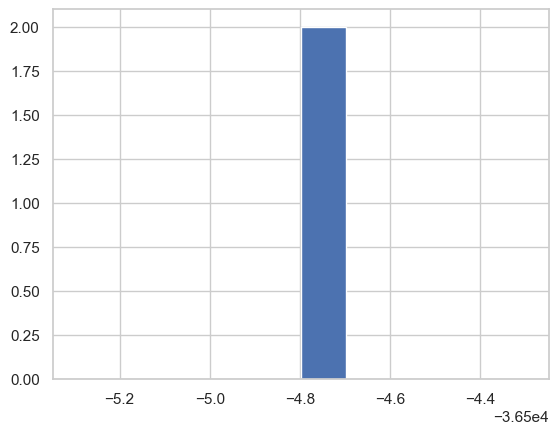

In [46]:
plt.hist(df['UnitPrice'][df['UnitPrice']<0])

In [48]:
#There are some negative values in the “UnitPrice” feature, price cannot be negative, so in the next phase we will remove these values.

In [64]:
#Computing pairwise correlation of columns, excluding null values.
features = ['CustomerID', 'Quantity', 'UnitPrice']
# Calculatimg the correlation matrix
correlation_matrix = df[features].corr()
# Printing the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
            CustomerID  Quantity  UnitPrice
CustomerID    1.000000 -0.000844  -0.000828
Quantity     -0.000844  1.000000  -0.000994
UnitPrice    -0.000828 -0.000994   1.000000


<Axes: >

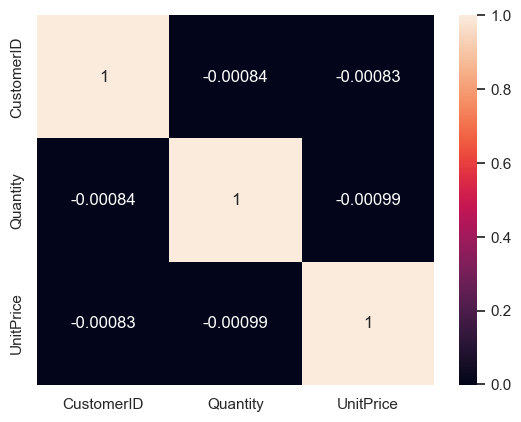

In [66]:
#Plotting the above correlation-matrix as a color-encoded matrix:
sns.heatmap(df[features].corr(),annot=True)

In [19]:
#Data Preparation
#Making a copy of our dataset.
df2 = df.copy()
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 495478 entries, 0 to 495477
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   CustomerID   361878 non-null  float64
 1   InvoiceNo    495478 non-null  object 
 2   InvoiceDate  495478 non-null  object 
 3   StockCode    495478 non-null  object 
 4   Description  494024 non-null  object 
 5   Quantity     495478 non-null  int64  
 6   UnitPrice    495478 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 26.5+ MB


In [21]:
#Removing missing values for the new dataset(copy of dataset).
df2 = df2.dropna()
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 361878 entries, 0 to 495477
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   CustomerID   361878 non-null  float64
 1   InvoiceNo    361878 non-null  object 
 2   InvoiceDate  361878 non-null  object 
 3   StockCode    361878 non-null  object 
 4   Description  361878 non-null  object 
 5   Quantity     361878 non-null  int64  
 6   UnitPrice    361878 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 22.1+ MB


In [25]:
#Turning all the negative values and zeros of the “Quantity” feature, that we have found in the previous phase, into NA/null values.
df2['Quantity'][df2['Quantity'] <= 0] = None
df2['Quantity'].describe()

count    354345.000000
mean         12.048913
std         190.428127
min           1.000000
25%           2.000000
50%           4.000000
75%          12.000000
max       80995.000000
Name: Quantity, dtype: float64

(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

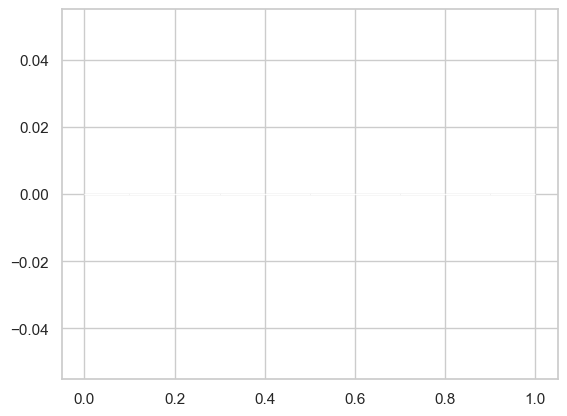

In [27]:
plt.hist(df2['Quantity'][df2['Quantity'] <= 0])

In [29]:
#Turning all the negative values and zeros of the “UnitPrice” feature, that we have found in the previous phase, into NA/null values.
df2['UnitPrice'][df2['UnitPrice']<=0] = None
df2['UnitPrice'].describe()

C:\Users\Dilip\AppData\Local\Temp\ipykernel_8856\2949438459.py:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df2['UnitPrice'][df2['UnitPrice']<=0] = None


count    361854.000000
mean         10.745535
std         233.168329
min           0.003300
25%           4.125000
50%           6.435000
75%          12.375000
max      128601.000000
Name: UnitPrice, dtype: float64

(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

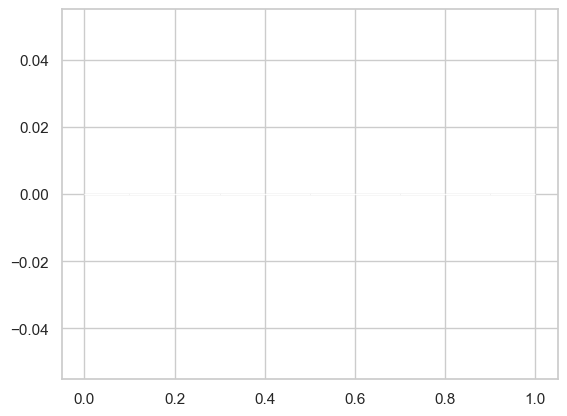

In [31]:
plt.hist(df2['UnitPrice'][df2['UnitPrice']<=0])

In [33]:
#Checking the size of our dataset after we have removed negative values and zeros from the “Quantity” and “UnitPrice” features.
df2 = df2.dropna()
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 354321 entries, 0 to 495477
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   CustomerID   354321 non-null  float64
 1   InvoiceNo    354321 non-null  object 
 2   InvoiceDate  354321 non-null  object 
 3   StockCode    354321 non-null  object 
 4   Description  354321 non-null  object 
 5   Quantity     354321 non-null  float64
 6   UnitPrice    354321 non-null  float64
dtypes: float64(3), object(4)
memory usage: 21.6+ MB


In [118]:
#Our new dataset includes 354,321 records and 7 fields after removing nulls.

In [122]:
#There are several features that we do not need, such as “StockCode“ and “Description” so, we will drop them.
df2.drop(['StockCode','Description'], axis=1, inplace=True)
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 354321 entries, 0 to 495477
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   CustomerID   354321 non-null  float64
 1   InvoiceNo    354321 non-null  object 
 2   InvoiceDate  354321 non-null  object 
 3   Quantity     354321 non-null  float64
 4   UnitPrice    354321 non-null  float64
dtypes: float64(3), object(2)
memory usage: 16.2+ MB


In [124]:
#Let's look at the new dataset
df2.head()

,CustomerID,InvoiceNo,InvoiceDate,Quantity,UnitPrice
0,17850.0,536365,25-09-2020,6.0,8.415
1,17850.0,536365,25-09-2020,6.0,11.187
2,17850.0,536365,25-09-2020,8.0,9.075
3,17850.0,536365,25-09-2020,6.0,11.187
4,17850.0,536365,25-09-2020,6.0,11.187


In [126]:
df2.tail()

,CustomerID,InvoiceNo,InvoiceDate,Quantity,UnitPrice
495473,15804.0,581585,03-10-2021,12.0,6.435
495474,13113.0,581586,04-10-2021,8.0,9.735
495475,13113.0,581586,04-10-2021,24.0,4.125
495476,13113.0,581586,04-10-2021,24.0,29.535
495477,13113.0,581586,04-10-2021,10.0,23.364


In [39]:
 #Giving new names to our features and use capital letters.
df2=df2.rename(columns={'CustomerID': 'ID_OF_CUSTOMER', 'InvoiceNo': 'NUMBER_OF_INVOICE',
 'InvoiceDate': 'DATE_OF_INVOICE', 'Quantity': 'QUANTITY',
 'UnitPrice': 'PRICE_OF_UNIT'})
df2.head()

,ID_OF_CUSTOMER,NUMBER_OF_INVOICE,DATE_OF_INVOICE,StockCode,Description,QUANTITY,PRICE_OF_UNIT
0,17850.0,536365,25-09-2020,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,8.415
1,17850.0,536365,25-09-2020,71053,WHITE METAL LANTERN,6.0,11.187
2,17850.0,536365,25-09-2020,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,9.075
3,17850.0,536365,25-09-2020,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,11.187
4,17850.0,536365,25-09-2020,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,11.187


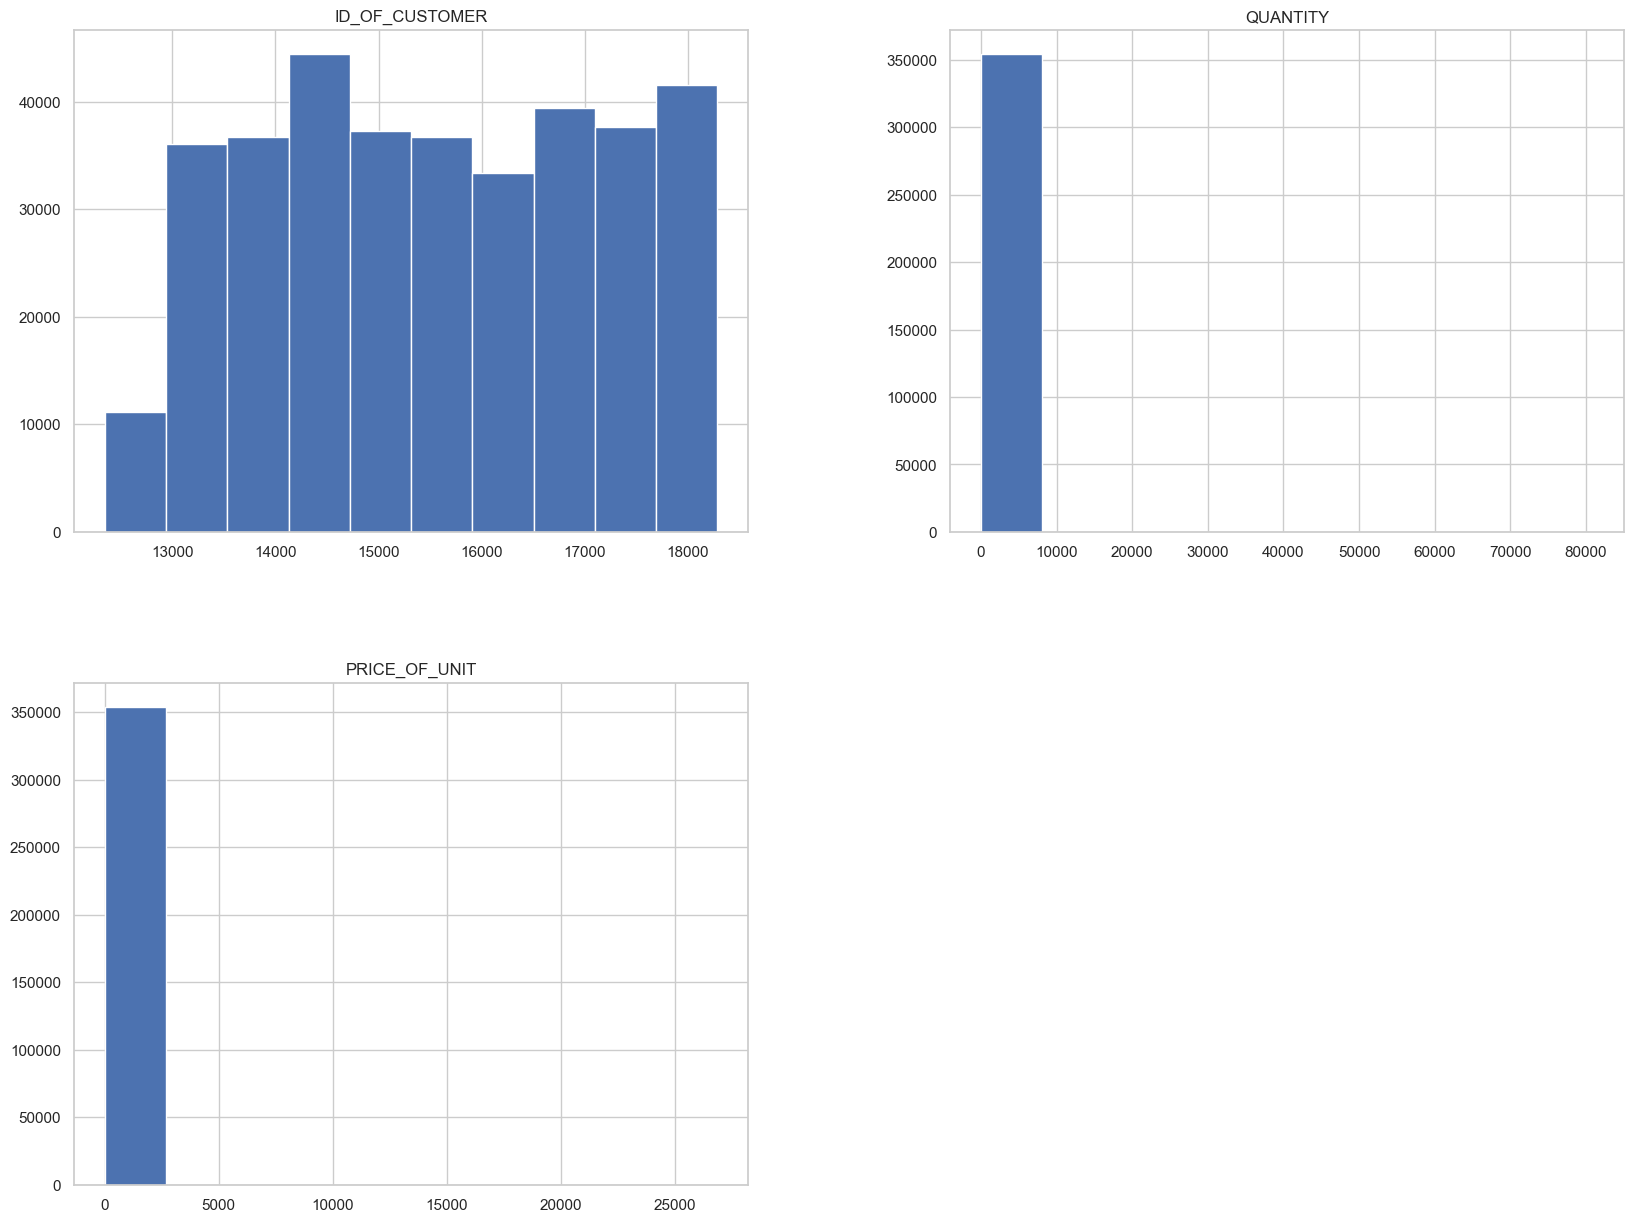

In [43]:
#Creating visualizations for our features
%matplotlib inline
import matplotlib.pyplot as plt
df2.hist(bins=10, figsize=(20,15))
plt.savefig("attribute_histogram_plots")
plt.show()

In [45]:
#Creating a new feature that represents the total purchase
df2['TOTAL_PURCHASE'] = df2['QUANTITY'] * df2['PRICE_OF_UNIT']
df2.head()

,ID_OF_CUSTOMER,NUMBER_OF_INVOICE,DATE_OF_INVOICE,StockCode,Description,QUANTITY,PRICE_OF_UNIT,TOTAL_PURCHASE
0,17850.0,536365,25-09-2020,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,8.415,50.490
1,17850.0,536365,25-09-2020,71053,WHITE METAL LANTERN,6.0,11.187,67.122
2,17850.0,536365,25-09-2020,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,9.075,72.600
3,17850.0,536365,25-09-2020,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,11.187,67.122
4,17850.0,536365,25-09-2020,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,11.187,67.122


In [47]:
#Since the feature “DATE_OF_INVOICE” is a categorical feature, we have to convert it to a real date.
df2['DATE_OF_INVOICE']=pd.to_datetime(df2['DATE_OF_INVOICE'])
df2.head()

C:\Users\Dilip\AppData\Local\Temp\ipykernel_8856\1524461676.py:2: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df2['DATE_OF_INVOICE']=pd.to_datetime(df2['DATE_OF_INVOICE'])


,ID_OF_CUSTOMER,NUMBER_OF_INVOICE,DATE_OF_INVOICE,StockCode,Description,QUANTITY,PRICE_OF_UNIT,TOTAL_PURCHASE
0,17850.0,536365,2020-09-25,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,8.415,50.490
1,17850.0,536365,2020-09-25,71053,WHITE METAL LANTERN,6.0,11.187,67.122
2,17850.0,536365,2020-09-25,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,9.075,72.600
3,17850.0,536365,2020-09-25,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,11.187,67.122
4,17850.0,536365,2020-09-25,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,11.187,67.122


In [49]:
#Extracting the month and year from the “InvoiceDate” feature:
df2['MONTH_BY_YEAR'] = df2['DATE_OF_INVOICE'].apply(lambda x: x.strftime('%b-%Y'))
df2.head()

,ID_OF_CUSTOMER,NUMBER_OF_INVOICE,DATE_OF_INVOICE,StockCode,Description,QUANTITY,PRICE_OF_UNIT,TOTAL_PURCHASE,MONTH_BY_YEAR
0,17850.0,536365,2020-09-25,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,8.415,50.490,Sep-2020
1,17850.0,536365,2020-09-25,71053,WHITE METAL LANTERN,6.0,11.187,67.122,Sep-2020
2,17850.0,536365,2020-09-25,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,9.075,72.600,Sep-2020
3,17850.0,536365,2020-09-25,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,11.187,67.122,Sep-2020
4,17850.0,536365,2020-09-25,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,11.187,67.122,Sep-2020


In [51]:
#Creating a pivot table that takes the columns as input, and groups the entries into a two-dimensional table in such a way that provides a multidimensional summarization of the data.
SALES=df2.pivot_table(index=['ID_OF_CUSTOMER'],columns=['MONTH_BY_YEAR'],values='TOTAL_PURCHASE',aggfunc='sum',fill_value=0).reset_index()
SALES.head()

MONTH_BY_YEAR,ID_OF_CUSTOMER,Apr-2021,Aug-2021,Dec-2020,Feb-2021,Jan-2021,Jul-2021,Jun-2021,Mar-2021,May-2021,Nov-2020,Oct-2020,Oct-2021,Sep-2020,Sep-2021
0,12346.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,254705.880,0.000,0.000,0.000,0.000
1,12747.0,1241.790,0.000,1025.574,1461.768,0.000,2228.754,995.610,1083.555,0.000,1000.032,1147.443,1447.050,1183.248,1032.009
2,12748.0,7965.705,7937.259,1652.112,4250.796,3609.771,21193.755,2306.931,6713.025,2990.724,552.651,11123.508,1291.521,3658.611,36028.740
3,12749.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,2835.030,6257.229,0.000,0.000,0.000,0.000,4407.645
4,12820.0,0.000,1134.408,0.000,0.000,0.000,718.641,0.000,0.000,0.000,562.518,0.000,694.155,0.000,0.000


In [53]:
#Summing all the months sales.
SALES['CLV']=SALES.iloc[:,2:].sum(axis=1)
SALES.head()

MONTH_BY_YEAR,ID_OF_CUSTOMER,Apr-2021,Aug-2021,Dec-2020,Feb-2021,Jan-2021,Jul-2021,Jun-2021,Mar-2021,May-2021,Nov-2020,Oct-2020,Oct-2021,Sep-2020,Sep-2021,CLV
0,12346.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,254705.880,0.000,0.000,0.000,0.000,254705.880
1,12747.0,1241.790,0.000,1025.574,1461.768,0.000,2228.754,995.610,1083.555,0.000,1000.032,1147.443,1447.050,1183.248,1032.009,12605.043
2,12748.0,7965.705,7937.259,1652.112,4250.796,3609.771,21193.755,2306.931,6713.025,2990.724,552.651,11123.508,1291.521,3658.611,36028.740,103309.404
3,12749.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,2835.030,6257.229,0.000,0.000,0.000,0.000,4407.645,13499.904
4,12820.0,0.000,1134.408,0.000,0.000,0.000,718.641,0.000,0.000,0.000,562.518,0.000,694.155,0.000,0.000,3109.722


<Axes: xlabel='CLV', ylabel='Count'>

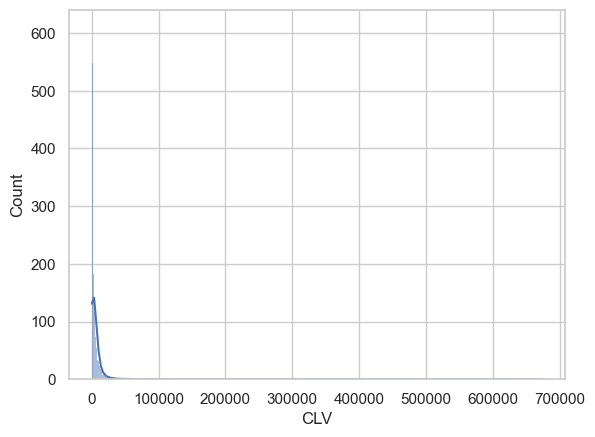

In [55]:
#Exploring our new feature CLV
sns.histplot(SALES['CLV'],kde=True)

In [57]:
SALES['CLV'].describe()

count      3920.000000
mean       5710.823607
std       22444.499564
min           0.000000
25%         915.024000
50%        2013.396000
75%        4864.818750
max      674572.338000
Name: CLV, dtype: float64

In [59]:
#Building a new data set that will consist only of the features we are interested in
df3 = SALES[['ID_OF_CUSTOMER','Sep-2021','Aug-2021','Jul-2021','Jun-2021','May-2021','Apr-2021','CLV']]
df3.head()

MONTH_BY_YEAR,ID_OF_CUSTOMER,Sep-2021,Aug-2021,Jul-2021,Jun-2021,May-2021,Apr-2021,CLV
0,12346.0,0.000,0.000,0.000,0.000,0.000,0.000,254705.880
1,12747.0,1032.009,0.000,2228.754,995.610,0.000,1241.790,12605.043
2,12748.0,36028.740,7937.259,21193.755,2306.931,2990.724,7965.705,103309.404
3,12749.0,4407.645,0.000,0.000,0.000,6257.229,0.000,13499.904
4,12820.0,0.000,1134.408,718.641,0.000,0.000,0.000,3109.722


In [61]:
df4 = pd.DataFrame({'ID_OF_CUSTOMER': SALES['ID_OF_CUSTOMER'],
 'Sep-2021': SALES['Sep-2021'],
 'Aug-2021': SALES['Aug-2021'],
 'Jul-2021': SALES['Jul-2021'],
 'Jun-2021': SALES['Jun-2021'],
 'May-2021': SALES['May-2021'],
 'Apr-2021': SALES['Apr-2021'],
 'CLV': SALES['CLV']})
df4.head()

,ID_OF_CUSTOMER,Sep-2021,Aug-2021,Jul-2021,Jun-2021,May-2021,Apr-2021,CLV
0,12346.0,0.000,0.000,0.000,0.000,0.000,0.000,254705.880
1,12747.0,1032.009,0.000,2228.754,995.610,0.000,1241.790,12605.043
2,12748.0,36028.740,7937.259,21193.755,2306.931,2990.724,7965.705,103309.404
3,12749.0,4407.645,0.000,0.000,0.000,6257.229,0.000,13499.904
4,12820.0,0.000,1134.408,718.641,0.000,0.000,0.000,3109.722


In [63]:
#Finding out the correlation between those features
df4.corr()

,ID_OF_CUSTOMER,Sep-2021,Aug-2021,Jul-2021,Jun-2021,May-2021,Apr-2021,CLV
ID_OF_CUSTOMER,1.000000,-0.022156,0.008848,0.022276,0.005884,-0.011357,0.019287,0.000264
Sep-2021,-0.022156,1.000000,0.424705,0.435704,0.461952,0.442011,0.134390,0.570714
Aug-2021,0.008848,0.424705,1.000000,0.670437,0.454727,0.464365,0.599974,0.720449
Jul-2021,0.022276,0.435704,0.670437,1.000000,0.558589,0.470242,0.566625,0.766908
Jun-2021,0.005884,0.461952,0.454727,0.558589,1.000000,0.588904,0.320168,0.658555
May-2021,-0.011357,0.442011,0.464365,0.470242,0.588904,1.000000,0.398074,0.627049
Apr-2021,0.019287,0.134390,0.599974,0.566625,0.320168,0.398074,1.000000,0.519073
CLV,0.000264,0.570714,0.720449,0.766908,0.658555,0.627049,0.519073,1.000000


In [65]:
#The feature we are going to predict is the “CLV”. So let’s look at how much each independent variable correlates with this target variable.
corr_matrix = df4.corr()
corr_matrix["CLV"].sort_values(ascending=False)

CLV               1.000000
Jul-2021          0.766908
Aug-2021          0.720449
Jun-2021          0.658555
May-2021          0.627049
Sep-2021          0.570714
Apr-2021          0.519073
ID_OF_CUSTOMER    0.000264
Name: CLV, dtype: float64

<Axes: >

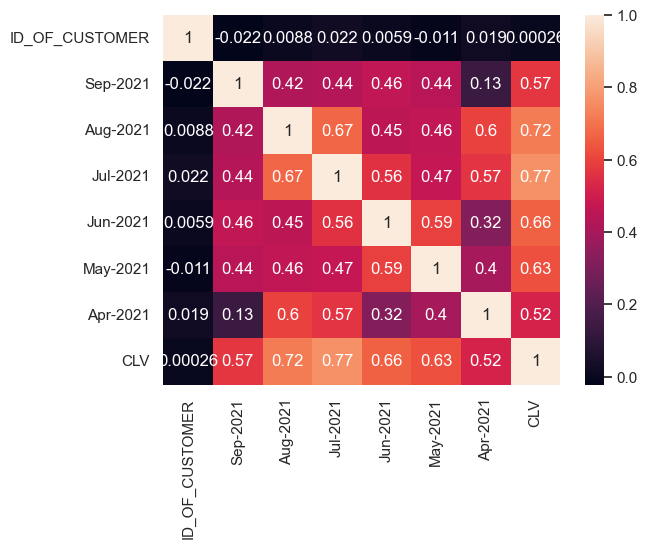

In [192]:
#The CLV tends to increase when Aug-2021, Jul-2021, Apr 2021, Sep-2021 and May-2021 go up. We can see a small positice correlation between Jun-2021 and the CLV. And finally, coefficient close to zero indicate that there is no linear correlation.
#Let’s visualize the correlation between variables
sns.heatmap(df4.corr(),annot=True)

In [67]:
#Modeling

#First let's check the column labels of our new dataset.
df4.columns

Index(['ID_OF_CUSTOMER', 'Sep-2021', 'Aug-2021', 'Jul-2021', 'Jun-2021',
       'May-2021', 'Apr-2021', 'CLV'],
      dtype='object')

In [71]:
#Now, let's to divide the given columns into two types of variables dependent (or target variable) and independent variable (or feature variables). Select latest 6 months as independent variables.
X = df4[ ['Sep-2021', 'Aug-2021', 'Jul-2021', 'Jun-2021','May-2021','Apr-2021'] ]
y = df4[ ['CLV']]
clv_features = [X for i,X in enumerate(X.columns) if i!=6]

In [302]:
#Before splitting the data for training set and test set it is usually acceptable to run a regression on the entire data to see if there is a model at all

import statsmodels.api as st
X1 = st.add_constant(X)
reg_model=st.OLS(y,X1)
result=reg_model.fit()
print(result.summary2())

                  Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.765     
Dependent Variable: CLV              AIC:                84000.4900
Date:               2024-06-30 16:15 BIC:                84044.4069
No. Observations:   3920             Log-Likelihood:     -41993.   
Df Model:           6                F-statistic:        2128.     
Df Residuals:       3913             Prob (F-statistic): 0.00      
R-squared:          0.765            Scale:              1.1834e+08
--------------------------------------------------------------------
             Coef.    Std.Err.     t     P>|t|    [0.025     0.975] 
--------------------------------------------------------------------
const       886.4243  181.9010   4.8731  0.0000  529.7947  1243.0540
Sep-2021      1.1297    0.0679  16.6415  0.0000    0.9966     1.2628
Aug-2021      1.6337    0.0760  21.4838  0.0000    1.4846     1.7828
Jul-2021      1.3005    0.0467  27.8282  0.0000    1.2089   

In [202]:
#Our initial test shows that in our model, 79% of the variability in Y can be explained using X and the p-values for all of the variables are smaller than 0.05. This is good.

#To understand model performance, dividing the dataset into a training set and a test set is a good strategy.

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [330]:
# Model 1: Linear Regression

#Linear Regression is one of the most common regression algorithms. 
#Let’s fit the linear regression model

from sklearn.linear_model import LinearRegression
regressor = LinearRegression(fit_intercept=False)
regressor.fit(X_train, y_train)

LinearRegression(fit_intercept=False)

In [332]:
X_train1 = st.add_constant(X_train)
reg_model=st.OLS(y_train,X_train1)
result=reg_model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                    CLV   R-squared:                       0.711
Model:                            OLS   Adj. R-squared:                  0.710
Method:                 Least Squares   F-statistic:                     1073.
Date:                Sun, 30 Jun 2024   Prob (F-statistic):               0.00
Time:                        16:30:18   Log-Likelihood:                -28400.
No. Observations:                2626   AIC:                         5.681e+04
Df Residuals:                    2619   BIC:                         5.685e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        916.0750    246.290      3.720      0.0

In [334]:
#Let’s check the linear regression model’s precision

print("Precision of linear regression on training set: {:.3f}".format(regressor.score(X_train, y_train)))
print("Precision of linear regression on test set: {:.3f}".format(regressor.score(X_test, y_test)))

Precision of linear regression on training set: 0.709
Precision of linear regression on test set: 0.871


In [210]:
#Model 2: Decision Tree

#Let’s fit the decision tree regressor model
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [212]:
#Let’s check the decision tree regressor model’s precision

print("Precision of decision tree regressor on training set: {:.3f}".format(dt.score(X_train, y_train)))
print("Precision of decision tree regressor on test set: {:.3f}".format(dt.score(X_test, y_test)))

Precision of decision tree regressor on training set: 0.749
Precision of decision tree regressor on test set: 0.345


In [214]:
#Checking the feature importances of our decision tree regressor model. Feature importance rates how important each feature is for the decision a tree makes. It is a number between 0 and 1 for each feature, where 0 means “not used at all” and 1 means “perfectly predicts the target”. The feature importances always sum to 1:

print("Feature importances:\n{}".format(dt.feature_importances_))

Feature importances:
[0.56151416 0.01021079 0.0472346  0.32681499 0.04656085 0.0076646 ]


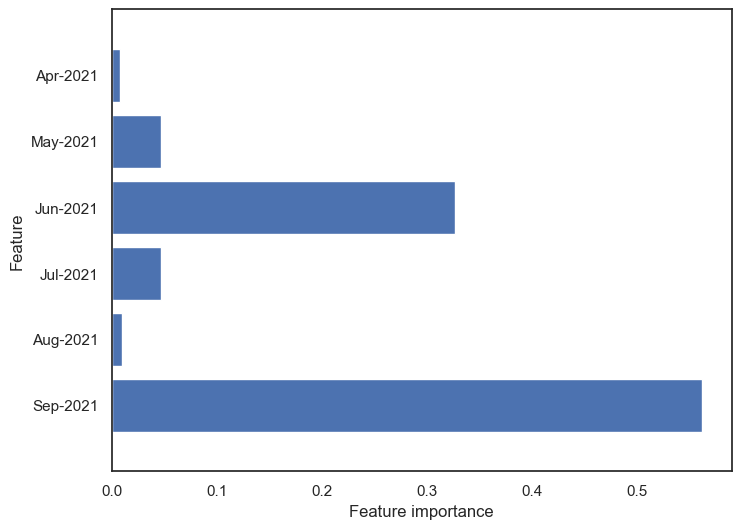

In [216]:
#Visualizing the feature importances:

sns.set(style="white")
def plot_feature_importances_clv(model):
    plt.figure(figsize=(8,6))
    n_features = 6
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), clv_features)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)
    
plot_feature_importances_clv(dt)

In [218]:
#Model Evaluation

import numpy as np
from sklearn.metrics import mean_squared_error

In [220]:
#1.Linear Regression
#Let’s predict using our linear regression model

y_pred_regressor = regressor.predict(X_test)

In [222]:
#Let’s evaluate our linear regression model’s precision using the R squared metric:

regressor_r = regressor.score(X_test, y_test)
print("Linear Regression R squared:","{:.2%}".format(regressor_r))

Linear Regression R squared: 87.30%


In [226]:
#Our linear regression model can explain 87.30% of the variability in the ‘CLV’ feature using our 6 features (‘Sep-2021’, ‘Aug-2021’, ‘Jul-2021’, ‘Jun-2021’,‘May-2021’, and ‘Apr-2021’)

#Let’s evaluate our linear regression model’s accuracy using the RMSE metric:

regressor_mse = mean_squared_error(y_pred_regressor, y_test)
regressor_rmse = np.sqrt(regressor_mse)
print('Linear Regression RMSE: %.4f' % regressor_rmse)

Linear Regression RMSE: 8033.6036


In [228]:
#Our linear regression model was able to predict the CLV value of every customer in the test set within $8033.6036 of the real CLV value.

In [230]:
#2.Decision Tree
#Let’s predict using our decision tree regressor model
y_pred_dt = dt.predict(X_test)

In [232]:
#Let’s evaluate our decision tree regressor model’s precision using the R squared metric:
dt_r = dt.score(X_test, y_test)
print("Decision Tree R squared:","{:.2%}".format(dt_r))

Decision Tree R squared: 34.47%


In [234]:
#Let’s evaluate our decision tree regressor model’s accuracy using the RMSE metric:
dt_mse = mean_squared_error(y_pred_dt, y_test)
dt_rmse = np.sqrt(dt_mse)
print('Decision Tree RMSE: %.4f' % dt_rmse)

Decision Tree RMSE: 18251.4385


In [236]:
#Our Decision Tree model was able to predict the CLV value of every customer in the test set within $18251.4385 of the real CLV value

In [240]:
#Now, let’s see which model has the lowest RMSE

models = ['Linear Regression', 'Decision Tree']
tests_rmse = [regressor_rmse, dt_rmse]
tests_r = [regressor_r, dt_r]
compare_models = pd.DataFrame({ "Algorithms": models, "Tests RMSE": tests_rmse })
compare_models.sort_values(by = "Tests RMSE", ascending = True)


,Algorithms,Tests RMSE
0,Linear Regression,8033.603622
1,Decision Tree,18251.438547


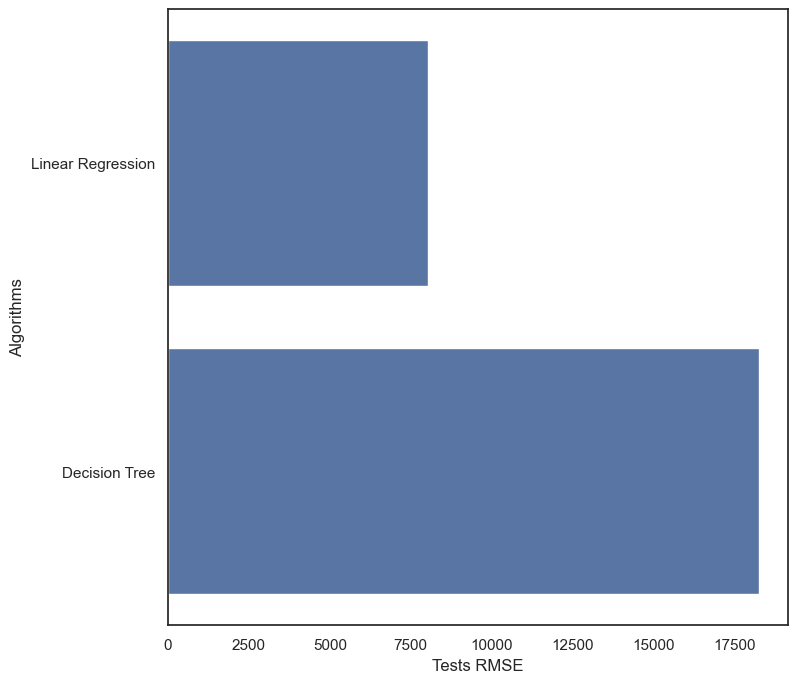

In [242]:
#Let’s visualize the above results:

import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(8,8))
sns.barplot(x = "Tests RMSE", y = "Algorithms", data = compare_models)
plt.show()

In [244]:
#As can be seen, the model that is most precise, that is, the one whose expected average error is the lowest (i.e., the distance between the evaluation and the data is the shortest) is our linear regression model.

In [248]:
#Now, let’s see which model has the highest R Squared

compare_models = pd.DataFrame({ "Algorithms": models, "Tests R Squared": tests_r })
compare_models.sort_values(by = "Tests R Squared", ascending = False)

,Algorithms,Tests R Squared
0,Linear Regression,0.873046
1,Decision Tree,0.344730


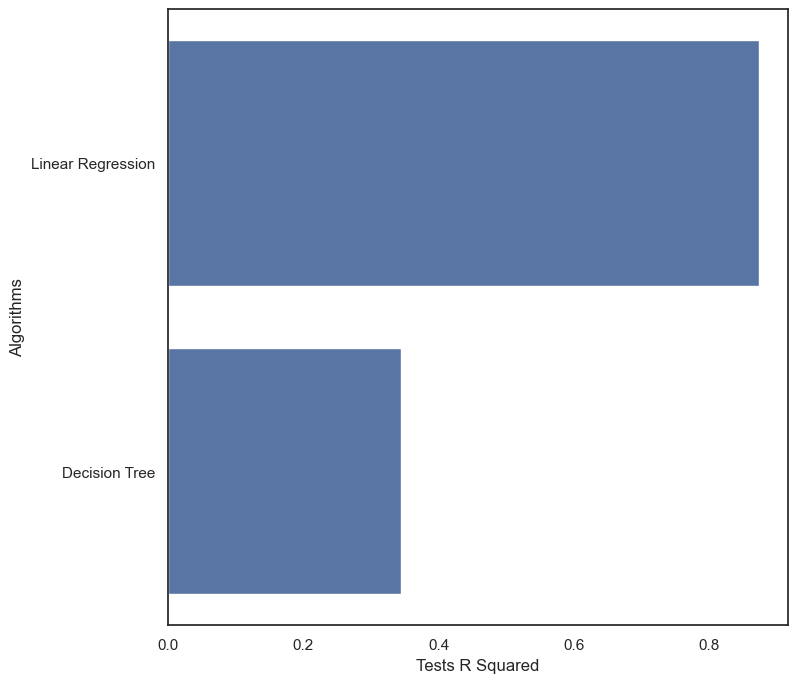

In [250]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(8,8))
sns.barplot(x = "Tests R Squared", y = "Algorithms", data = compare_models)
plt.show()

In [256]:
#As can be seen, the model that is most accurate, that is, the one whose predictive power is the highest is our linear regression model again.

In [340]:
import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings("ignore")
#Model Deployment

#Building an interface that will receive from our end-user the input data and give him a prediction about the customer’s CLV.

a = float(input("Please enter the revenue from a customer one month ago:"))
b = float(input("Please enter the revenue from a customer two months ago:"))
c = float(input("Please enter the revenue from a customer three months ago :"))
d = float(input("Please enter the revenue from a customer four months ago:"))
e = float(input("Please enter the revenue from a customer five months ago :"))
f = float(input("Please enter the revenue from a customer six months ago:"))
new_data = np.array([a,b,c,d,e,f]).reshape(1,-1)
new_pred=regressor.predict(new_data)
new_pred1 = new_pred[0][0]
print("\033[1m The customer CLV is:", '${:,.0f}'.format(new_pred1))

Please enter the revenue from a customer one month ago: 22251
Please enter the revenue from a customer two months ago: 6900
Please enter the revenue from a customer three months ago : 18851
Please enter the revenue from a customer four months ago: 3869
Please enter the revenue from a customer five months ago : 6448
Please enter the revenue from a customer six months ago: 3541


 The customer CLV is: $82,909


In [342]:
#Considering the mean CLV of a customer is $82,909, and assuming the RMSE of our linear model is $8033.6036, let’s construct a 99% confidence interval for the mean CLV of that customer.

ExpectedValue = new_pred1
ExpectedValue

82908.61045077496

In [344]:
StandardError = int(regressor_rmse)
StandardError

8033

In [346]:
"""Now let’s write a function that provides a Z value for a cumulative probability using a standard normal distribution. 
If we assume your data is normally distributed and are interested in knowing the Z value for a given probability, this function will provide that using the cumulative probabilities of the distribution.
"""
import scipy.stats as si
def normsinv(x):
 x = si.norm.ppf(x)
 return (x)

In [348]:
"""Using our function to find the Z value for a 99% confidence interval, which is 0.5% probability, since we are dealing here with a two-tailed test. 
A two-tailed test is a method in which the critical area of a distribution is two-sided and tests whether a sample is greater or less than a range of values. 
It is used in null-hypothesis testing and testing for statistical significance
"""
alpha = 1 - 0.99
Z = round(abs(normsinv(0.5*alpha)),3)
Z

2.576

In [350]:
#Computing the upper bound of the range:

Upper = int(ExpectedValue + Z * StandardError)
Upper

103601

In [352]:
#Computing the lower bound of the range:

Lower = int(ExpectedValue - Z * StandardError)
Lower

62215

In [354]:
print("\033[1m With a confidence level of 99%, the CLV of the Customer is between " '${:,.0f}'.format(Lower),"and",'${:,.0f}.'.format(Upper),"The average value the CLV is " '${:,.0f}.'.format(ExpectedValue))

 With a confidence level of 99%, the CLV of the Customer is between $62,215 and $103,601. The average value the CLV is $82,909.


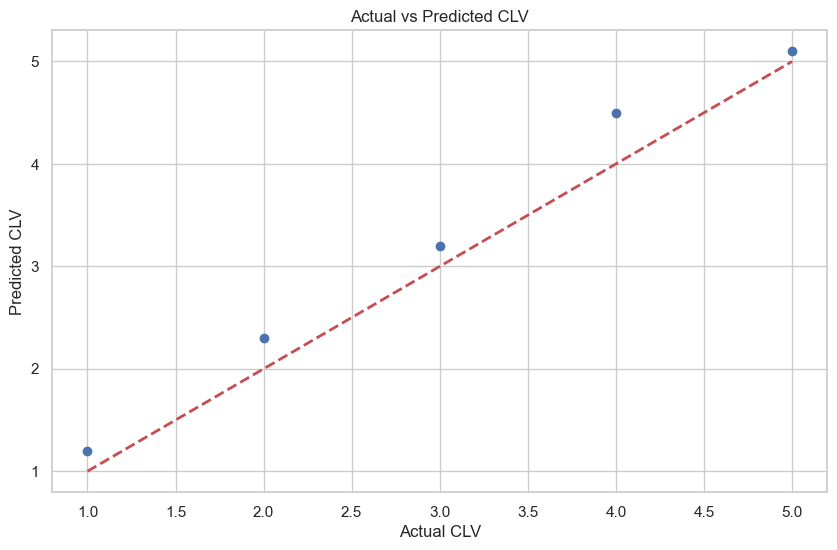

In [76]:
# Assuming y_test and y_pred_regressor are defined and contain appropriate data
import matplotlib.pyplot as plt

# Example data for demonstration
y_test = [1, 2, 3, 4, 5]
y_pred_regressor = [1.2, 2.3, 3.2, 4.5, 5.1]

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_regressor)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--', lw=2)
plt.xlabel('Actual CLV')
plt.ylabel('Predicted CLV')
plt.title('Actual vs Predicted CLV')
plt.show()
Predicted_CLV = y_pred_regressor

In [78]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np

# Load your dataset (assuming df4 is already loaded with the required columns)
X = df4[['Sep-2021', 'Aug-2021', 'Jul-2021', 'Jun-2021', 'May-2021', 'Apr-2021']]
y = df4['CLV']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict CLV for the test set
y_pred = model.predict(X_test)

# Analyze model coefficients to understand feature impact
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})
coefficients = coefficients.sort_values(by='Coefficient', ascending=False)

# Segment customers based on predicted CLV
df4['Predicted_CLV'] = model.predict(X)
df4['Customer_Segment'] = pd.qcut(df4['Predicted_CLV'], q=3, labels=['Low Value', 'Medium Value', 'High Value'])

# Identify customers at risk of churning
churn_risk_customers = df4[df4['Customer_Segment'] == 'Low Value']

# Print the results
print("Model Coefficients:")
print(coefficients)
print("\nCustomer Segments Distribution:")
print(df4['Customer_Segment'].value_counts())
print("\nCustomers at Risk of Churning:")
print(churn_risk_customers)

# Derive insights for cross-selling and upselling opportunities
high_value_customers = df4[df4['Customer_Segment'] == 'High Value']
# Assuming you have additional data to identify purchase patterns
# cross_selling_opportunities = identify_cross_selling_opportunities(high_value_customers)

# Example insights print out
print("\nHigh-Value Customers for Cross-Selling and Upselling:")
print(high_value_customers)

Model Coefficients:
    Feature  Coefficient
3  Jun-2021     2.107016
4  May-2021     1.965203
1  Aug-2021     1.697402
2  Jul-2021     1.305361
0  Sep-2021     1.067852
5  Apr-2021     0.278116

Customer Segments Distribution:
Customer_Segment
Low Value       1307
High Value      1307
Medium Value    1306
Name: count, dtype: int64

Customers at Risk of Churning:
      ID_OF_CUSTOMER  Sep-2021  Aug-2021  Jul-2021  Jun-2021  May-2021  \
0            12346.0     0.000     0.000      0.00       0.0       0.0   
5            12821.0     0.000     0.000      0.00       0.0       0.0   
12           12829.0     0.000     0.000      0.00       0.0       0.0   
14           12831.0     0.000     0.000      0.00       0.0       0.0   
17           12834.0     0.000     0.000      0.00       0.0       0.0   
...              ...       ...       ...       ...       ...       ...   
3911         18274.0   580.536     0.000      0.00       0.0       0.0   
3913         18277.0     0.000   364.254  